# House Prices - Advanced Regression Techniques (Kaggle)

Input files - [Downloaded here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)
1. *train.csv*
2. *test.csv*

#### Development Ideas
* Look in to LotShape vs Lot Area and Lot Frontage -- this may affect how I fill the nulls

In [1]:
### set up libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

pd.options.display.max_rows = 100

## Load and Preview Data

In [2]:
### load data
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

## merge in to one table for data cleaning
alldata_raw = pd.concat([train_raw, test_raw]).reset_index(drop=True)

In [3]:
### preview data
alldata_raw.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
### preview data cont
print(alldata_raw.shape)
# alldata_raw.info()
alldata_raw.dtypes

(2919, 81)


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object


In [5]:
### preview data cont
alldata_raw.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## Fill NULLS

In [6]:
### find columns with NaN - note python also treats None as na
cols_w_nan = alldata_raw.columns[alldata_raw.isna().any()]
alldata_raw[cols_w_nan].isna().sum()

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [7]:
### remove NaN
## fixed value na fill
nan_fill_fixed = {'MSZoning':'RL', 'Alley':'NoAlley', 'Utilities':'AllPub', 'Exterior1st':'VinylSd', 'Exterior2nd':'VinylSd',
                  'MasVnrType':'NoMasVnr', 'MasVnrArea':0, 'BsmtQual':'NoBsmt', 'BsmtCond':'NoBsmt', 'BsmtExposure':'NoBsmt', 
                  'BsmtFinType1':'NoBsmt', 'BsmtFinSF1':0,'BsmtFinType2':'NoBsmt', 'BsmtFinSF2':0, 'BsmtUnfSF':0,
                  'TotalBsmtSF':0, 'Electrical':'SBrkr', 'BsmtFullBath':0, 'BsmtHalfBath':0, 'KitchenQual':'TA', 'Functional':'Typ',
                  'FireplaceQu':'NoFire', 'GarageType':'NoGarage','GarageYrBlt':0, 'GarageFinish':'NoGarage', 'GarageCars':0,'GarageArea':0,
                  'GarageQual':'NoGarage', 'GarageCond':'NoGarage', 'PoolQC':'NoPool', 'Fence':'NoFence', 'MiscFeature':'NoMisc','SaleType':'WD'}
alldata = alldata_raw.fillna(nan_fill_fixed)

## Adhoc analysis
# for col in ('MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Electrical', 'BsmtFullBath', 
#             'BsmtHalfBath','KitchenQual', 'Functional','SaleType'):
#     print(alldata_raw[col].value_counts())

SalePrice    1459
dtype: int64


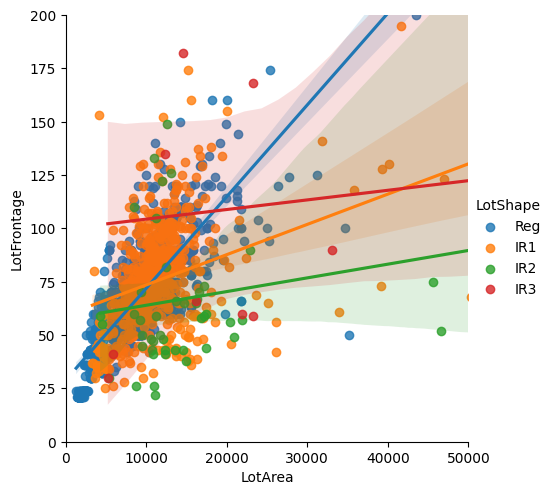

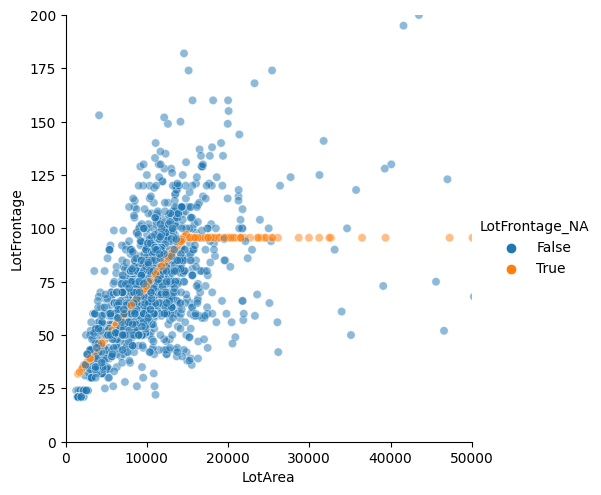

In [8]:
## Columns that need further investigation/shouldn't have fixed replacement:
## LotFrontage - LotArea and Lot Frontage approx linear relationship below <15k, for 15k+ LotArea, just use average Lot Frontage  
g = sns.lmplot(data=alldata, x='LotArea', y='LotFrontage', hue='LotShape')
g.set(xlim=(0,50000), ylim=(0,200))

alldata_lotareafrontage = alldata[alldata['LotArea'] <= 15000][['LotArea', 'LotFrontage']].dropna(subset=['LotArea', 'LotFrontage'])
lotareafrontage_lm = LinearRegression().fit(alldata_lotareafrontage['LotArea'].values.reshape(-1, 1), 
                                            alldata_lotareafrontage['LotFrontage'].values)
lotareafrontage_over20k = alldata[alldata['LotArea'] > 15000].LotFrontage.mean()

for i in range(len(alldata)):
    if pd.isna(alldata.iloc[i]['LotFrontage']):
        alldata.at[i, 'LotFrontage_NA'] = True
        if alldata.iloc[i]['LotArea'] <= 15000:
            lm_pred = lotareafrontage_lm.predict(np.array(alldata.iloc[i]['LotArea']).reshape(1, -1))
            alldata.at[i, 'LotFrontage'] = lm_pred[0]
        else:
            alldata.at[i, 'LotFrontage'] = lotareafrontage_over20k
    else:
        alldata.at[i, 'LotFrontage_NA'] = False

g=sns.relplot(data=alldata, kind='scatter', x='LotArea', y='LotFrontage', hue='LotFrontage_NA', alpha=0.5)
g.set(xlim=(0,50000), ylim=(0,200))


## check all NaN have been removed
cols_w_nan = alldata.columns[alldata.isna().any()]
print(alldata[cols_w_nan].isna().sum())

## Feature Engineering

In [9]:
## turn calendar variables in to duration variables
alldata['age_sold'] = alldata['YrSold']-alldata['YearBuilt']
alldata['age_remodel_sold'] = alldata['YrSold']-alldata['YearRemodAdd']
alldata['age_garage_sold'] = np.where(alldata['GarageYrBlt']==0, -1,
                                      alldata['YrSold']-alldata['GarageYrBlt'])
alldata['remodel_flag'] = np.where(alldata['YearBuilt']==alldata['YearRemodAdd'],'N','Y')

alldata.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], axis=1, inplace=True)

### Additional feature engineering added post-EDA

In [10]:
## create combined full/half bathroom columns
alldata['bsmt_bath'] = alldata['BsmtFullBath'].astype('float') + 0.5*alldata['BsmtHalfBath'].astype('float')
alldata['bath'] = alldata['FullBath'].astype('float') + 0.5*alldata['HalfBath'].astype('float')

alldata.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'], axis=1, inplace=True)

In [11]:
### convert object columns to categorical?


### convert MSSubClass to category
# train.MSSubClass = train.MSSubClass.astype('category')

### one-hot encoding?
# X = pd.get_dummies(df.iloc[:,cols], drop_first=True)

## Save Cleaned Data

In [12]:
### separate and save cleaned to csv
split_index = len(train_raw)
train = alldata[:split_index]
test = alldata[split_index:]

train.to_csv('train_clean.csv', index=False)
test.to_csv('test_clean.csv', index=False)